## 1.2. 컨테이너 타입

list, numpy 등의 경우 숫자들을 담은 컨테이너의 주소를 가리킴.
따라서 이를 복사하는 경우 주소를 복사하는 것이므로 원본과 복사본이 같은 주소를 가리키게 됨. => 수정 시 원본도 수정됨

이를 해결하기 위해서는 주소가 아닌 값을 복사하는 것이 필요함.

```python
np.copy(a)
```

이렇게 하면 주소가 아닌 값을 복사하게 됨.

## 1.3. 합성함수

합성함수의 정의: 함수 f1, f2가 있을 때, f1의 출력이 f2의 입력으로 들어가는 것을 합성함수라고 함.

이를 파이썬으로 표현하면 아래와 같음.

```python
def f1(x):
    return x + 1

def f2(x):
    return x * 2

g = f2(f1(x))
```

## 1.5. 객체 지향과 커스텀 클래스

> 파이토치로 머신러닝 또는 딥러닝 모델을 구축하려는 경우, 커스텀 클래스의 정의가 필요하다.

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

class Point():
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def draw(self):
        plt.plot(self.x, self.y, marker='o', c='k')


위는 클래스의 예시임
클래스라는 틀로부터 인스턴스를 찍어낸다고 생각하면 됨

어느 클래스든 가장 처음에는 그 클래스를 선언(initialize)하도록 돼 있음.

<br>


cf) self에 관하여

`__init__`을 포함한 모든 메서드는 첫 번째 인자로 항상 `self`를 받는다.
여기서 주의할 점은 `self`는 인스턴스를 생성할 때 들어가는 input이 아니라, 인스턴스 그 자체라는 것

이 부분이 직관적으로 느껴지지 않아 그 이유에 관해 Claude와 대화해봄:

```python
point = Point(1,2)
```

일때 내부적으로는

```python
point = Point.__init__(point, 1, 2)
```
와 같은 방식으로 동작함.

그렇다면 왜 input으로 들어가지도 않으면서 `self`를 인자로써 받는 것일까?
이는 Python이라는 언어의 철학과 맞닿아 있다고 함 == Explicit is better than implicit

Java와 같은 언어에서는 실제로 `this`라는 키워드를 쓸 때 `this`의 존재가 암시적으로 존재함


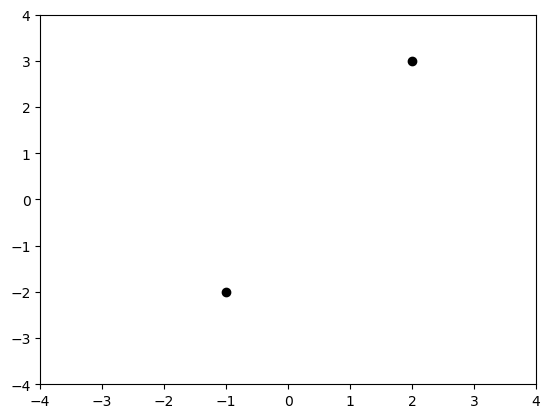

In [6]:
p1 = Point(2,3)
p2 = Point(-1,-2)

p1.draw()
p2.draw()
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.show()

In [5]:
class Circle1(Point):
    def __init__(self,x,y,r):
        # 부모 클래스인 Point의 init 메서드에서 가져오겠다는 뜻
        super().__init__(x,y)
        self.r = r
    
    def draw(self):
        c = patches.Circle(xy=(self.x, self.y), radius=self.r, fc='b', ec='k')
        ax.add_patch(c)

#### cf) super()에 대한 이해

super()를 알기 위해서는 MRO(Method Resolution Order)에 대한 이해가 필요함

MRO는 쉽게 말해 클래스 상속 관계에서 메서드를 호출할 때 어떤 순서로 호출할지를 결정하는 규칙임

이는 주로 1. 자식 클래스에서 가까운 부모 순, 2. 부모 클래스를 먼저 호출하는 순으로 결정됨.

이를 확인하기 위해 아래 예시를 확인해보면:


In [5]:
class Animal:
    def __init__(self, name):
        self.name = name
        print(f"{self.name} 생성")

class Bird(Animal):
    def __init__(self, name, wing_span):
        super().__init__(name)
        self.wing_span = wing_span
        print(f"날개 길이: {self.wing_span}")

eagle = Bird("독수리", 2.0)

독수리 생성
날개 길이: 2.0


In [12]:
print(Bird.__mro__)


(<class '__main__.Bird'>, <class '__main__.Animal'>, <class 'object'>)


`super()`는 두 가지 input을 받음 1. 현재 클래스 2. 현재 인스턴스

이후 MRO 기준 현재 클래스 다음에 오는 클래스 == 가장 가까운 부모 클래스 를 호출함

더 복잡한 예제:

In [13]:
class Vehicle:
    def __init__(self, speed):
        self.speed = speed
        print(f"속도: {speed}")

class Flyable:
    def __init__(self, height):
        self.height = height
        print(f"비행 고도: {height}")

class Aircraft(Vehicle, Flyable):
    def __init__(self, speed, height):
        # 두 부모 클래스의 초기화가 필요합니다
        super().__init__(speed)  # Vehicle의 __init__ 호출
        Flyable.__init__(self, height)  # 직접 호출

jet = Aircraft(900, 10000)

속도: 900
비행 고도: 10000


결론적으로 super는 부모 클래스에서 사용한 메서드(init 포함)를 **재사용**함으로써 불필요한 **코드 중복을 방지**할 수 있음.

In [21]:
c1_1 = Circle1(1,0,2)
print(c1_1.x, c1_1.y, c1_1.r)

1 0 2


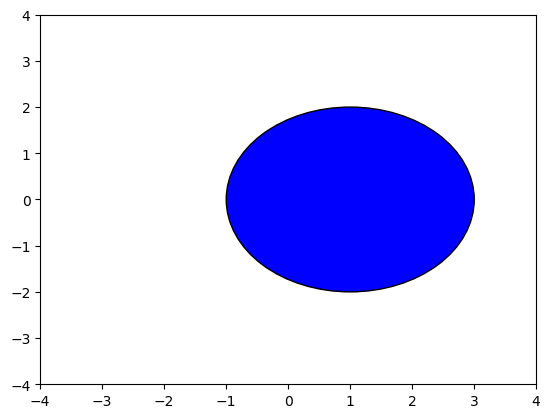

In [22]:
ax = plt.subplot()
plt.xlim(-4,4)
plt.ylim(-4,4)
c1_1.draw()

 > 부모 클래스와 같은 이름의 함수를 자식 클래스에서 역할을 달리 정의하는 것을 override라고 한다.

Q. 근데 super()를 명시적으로 안 써줘도 해당하는 클래스에 메서드가 없으면 자동으로 부모의 메서드를 확인하는 거 아닌가

A. 정리하면 `__init__`에는 무조건 필요하고 (모든 클래스는 `__init__`을 가지니까) 나머지 메서드는 안 써도 되긴 하는데 더 명시된다는 장점이 있다

## 1.6. 인스턴스를 함수로 사용하는 방법

클래스를 정의할 때 `__call__`이라는 함수를 정하고 그 함수에 수식을 적으면 됨.

In [23]:
class H:
    def __call__(self, x):
        return x**2 + 2

In [24]:
import numpy as np
x = np.arange(-1,1,0.25)
print(x)
# [-1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75]

[-1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75]


In [25]:
h = H()
y = h(x)

print(y)
# [3.     2.5625 2.25   2.0625 2.     2.0625 2.25   2.5625]

[3.     2.5625 2.25   2.0625 2.     2.0625 2.25   2.5625]
